## Sentimental Classification 
##### Goal: 
To accurately predict whether a given movie review is positive or negative.

In [106]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [107]:
df = pd.read_csv('IMDB Dataset.csv')

In [108]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [147]:
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (50000, 4)


In [109]:
#For making text processing we have to make sure to clean the data 
#Here we are removing HTML tags from the data

df['review'] = df['review'].str.replace(r'<[^>]+>', '', regex=True)

In [110]:
# Removing non-letters and lower case

df['review'] = df['review'].str.replace(r'[^a-zA-Z]', ' ', regex=True).str.lower()

In [111]:
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production  the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    petter mattei s  love in the time of money  is...
Name: review, dtype: object

In [112]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Exploration

## 1. Class Distribution

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


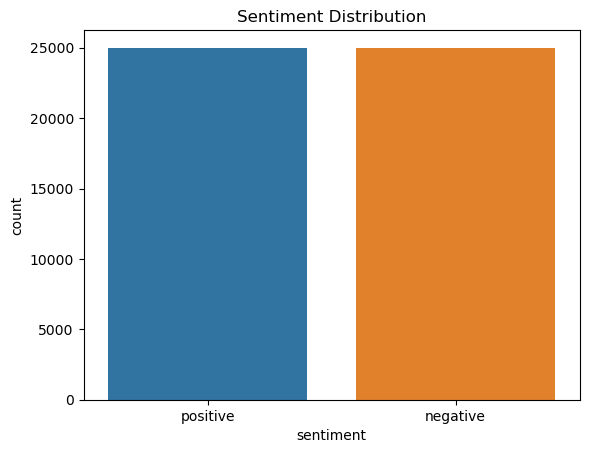

In [114]:
print(df['sentiment'].value_counts())

## Plot the class distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

## 2. Reviewing Length Distribution

In [115]:
# Calculate review lengths
df['review_length'] = df['review'].apply(lambda x: len(word_tokenize(x)))

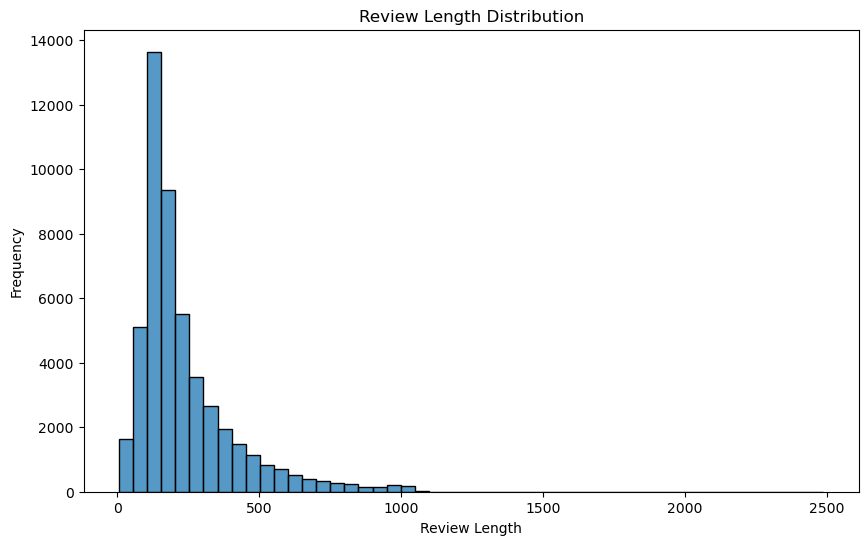

In [116]:
# Plotting the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=False)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## 3. Most Frequent Words in Positive and Negative Reviews

In [117]:

# Tokenize reviews
df['tokens'] = df['review'].apply(word_tokenize)
df['tokens']

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, there, s, a, family, where, a, lit...
4        [petter, mattei, s, love, in, the, time, of, m...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [i, m, going, to, have, to, disagree, with, th...
49999    [no, one, expects, the, star, trek, movies, to...
Name: tokens, Length: 50000, dtype: object

In [118]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokens']

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movies, high, art, ...
Name: tokens, Length: 50000, dtype: object

In [119]:
# Get the most common words in positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

positive_reviews,negative_reviews

(                                                  review sentiment  \
 0      one of the other reviewers has mentioned that ...  positive   
 1      a wonderful little production  the filming tec...  positive   
 2      i thought this was a wonderful way to spend ti...  positive   
 4      petter mattei s  love in the time of money  is...  positive   
 5      probably my all time favorite movie  a story o...  positive   
 ...                                                  ...       ...   
 49983  i loved it  having been a fan of the original ...  positive   
 49985  imaginary heroes is clearly the best film of t...  positive   
 49989  i got this one a few weeks ago and love it  it...  positive   
 49992  john garfield plays a marine who is blinded by...  positive   
 49995  i thought this movie did a down right good job...  positive   
 
        review_length                                             tokens  
 0                313  [one, reviewers, mentioned, watching, oz, epis..

In [120]:
# Count words for positive reviews
positive_word_count = Counter()
for tokens in positive_reviews['tokens']:
    positive_word_count.update(tokens)


In [121]:
# Most common words in positive reviews
most_common_positive = positive_word_count.most_common(20)
print("Most common words in positive reviews:")
print(most_common_positive)

Most common words in positive reviews:
[('film', 42095), ('movie', 37846), ('one', 27312), ('like', 17709), ('good', 15020), ('great', 12961), ('story', 12932), ('time', 12746), ('well', 12724), ('see', 12271), ('also', 10792), ('really', 10736), ('would', 10594), ('even', 9613), ('first', 9228), ('much', 9201), ('people', 8716), ('love', 8689), ('best', 8509), ('get', 8286)]


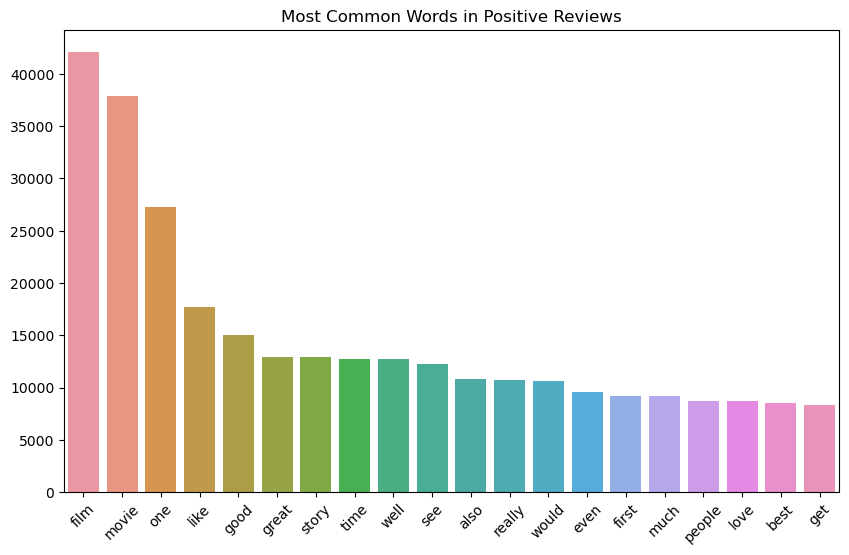

In [122]:
# Plotting the most common words
# Positive
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in most_common_positive], y=[count for word, count in most_common_positive])
plt.title('Most Common Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()

In [123]:
#Count words for negative reviews
negative_word_count = Counter()
for tokens in negative_reviews['tokens']:
    negative_word_count.update(tokens)

In [124]:
# Most common words in negative reviews
most_common_negative = negative_word_count.most_common(20)
print("Most common words in negative reviews:")
print(most_common_negative)

Most common words in negative reviews:
[('movie', 50091), ('film', 37581), ('one', 26273), ('like', 22451), ('even', 15243), ('good', 14717), ('bad', 14714), ('would', 14005), ('really', 12354), ('time', 12353), ('see', 10750), ('story', 10178), ('get', 10129), ('much', 10115), ('people', 9466), ('make', 9347), ('could', 9299), ('made', 8800), ('well', 8536), ('first', 8348)]


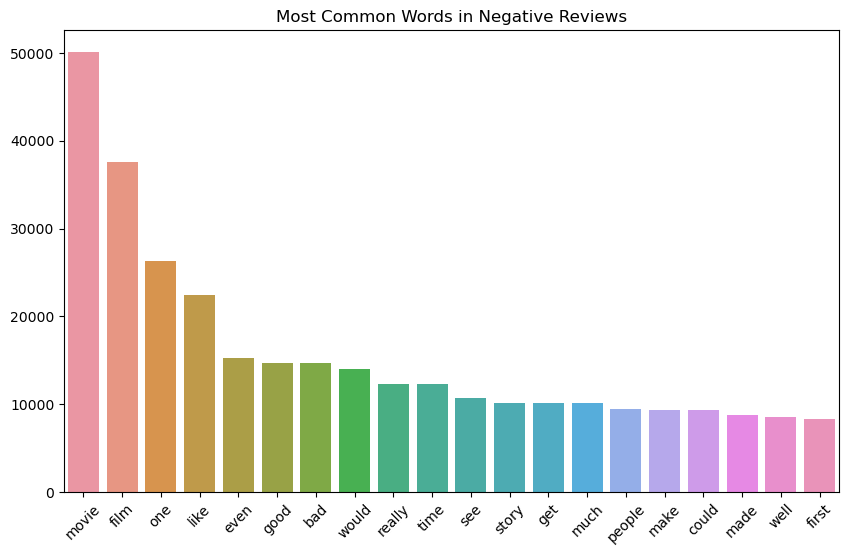

In [125]:
# Negative
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in most_common_negative], y=[count for word, count in most_common_negative])
plt.title('Most Common Words in Negative Reviews')
plt.xticks(rotation=45)
plt.show()

## Method -1 

Here we are going to use TF-IDF and logistic regression,Naive Bayes and Random forest methods for model analysis

### For Vectorization we are using the TFIDF vectorization to transfrom data into suitable fro model input


In [126]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

### Splitting the data into training and testing data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
#So in model training and CLassification we are gonna use Naive Bayes method 
#To perform naive bayes we have to use logistic regression as it is base line for it

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

### Using Naive Bayes

In [129]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [130]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [131]:
#Now evaluating the model using the Naive bayes
models = {'Logistic Regression': lr_model, 'Naive Bayes': nb_model, 'Random Forest': rf_model}

In [132]:
for name, model in models.items():
    predictions = model.predict(X_test)
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy_score(y_test, predictions)}\n")

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8864

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy: 0.85

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                  

### Result analysis:

#### Model Comparison: 
Comparing the results of different models to identify which one performs the best in terms of accuracy and F1-score.

#### Improve Text Preprocessing: 
Experimenting with more advanced NLP techniques such as stemming, lemmatization, or using n-grams in the vectorization step.

#### Hyperparameter Tuning: 
For the best-performing model, conducting hyperparameter tuning using grid search or random search to optimize its performance.

#### Use Different Vectorization Techniques:
using Word2Vec or GloVe embeddings instead of TF-IDF to see if they improve model performance.

#### Expand the Dataset: 
Sometimes models perform better when trained on more data. Consider augmenting the dataset or using additional data sources.

Above we are using Tf-IDF and Naive Bayes methods for Model analysis

# Method - 2

Here we are going to use SVM and Naive Bayes methods for model analysis

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

In [134]:
#Converting lables to binary format
df_sampled['sentiment'] = df_sampled['sentiment'].map({'positive': 1, 'negative': 0})

In [135]:
warnings.filterwarnings('ignore')
df_sampled = df.sample(frac=0.2, random_state=42)

As we are dealing with huge data and having intensive tasks such as training SVM and naive bayes on this large data sets like IMDB reviews ,it is taking long time to execute so here we are using some effiecient approcahes to reduce the time durability of execution of these methods

#### Processing and Vectorization

In [136]:
#Here we are reducing the max_features to avoid using bigrams if they are not so important
vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=3000)

#### Splitting the data into training and testing data

In [137]:
X_train, X_test, y_train, y_test = train_test_split(df_sampled['review'], df_sampled['sentiment'], test_size=0.2, random_state=42)

#### Using SVM model classification for model analysis

In [138]:
svm_model = make_pipeline(vectorizer, LinearSVC())
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

The reason we are using LInearSVC because it works and makes the data to execute faster than other methods,it is used for Large data sets

In [139]:
svm_predictions = svm_pipeline.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.84      0.85       999
    positive       0.84      0.88      0.86      1001

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



#### We are using Naive bayes model for analyzing the model and comparing with SVM

In [140]:
nb_model = make_pipeline(vectorizer, MultinomialNB())
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [141]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86       999
    positive       0.86      0.86      0.86      1001

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



The dataset contains movie reviews that are labeled as 'positive' or 'negative'. The code used these reviews to train the models to learn how to differentiate between positive and negative sentiments. After training, the models were tested with a separate set of reviews (the test set), and their predictions were compared against the actual labels to produce these classification reports.

The results show that both models are performing equally well with no significant difference between their ability to predict positive and negative reviews based on the text of the reviews.


So,Here by implementing the changes from before method we can see reduction in execution time for training and predicting with SVM and Naive Bayes classifier 

#### Based on the results we got can improve the results as mentioned below

mainly we should focus on

* Tuning model parameters using techniques like grid search.
* Using more complex models or ensembles.
* Increasing the dataset size or using different features, like bi-grams or   tri-grams in TF-IDF.
* Implementing more advanced text preprocessing techniques.


#### Feature Engineering: 
More sophisticated text features like sentiment scores or POS tagging could enhance the model's understanding.

#### Hyperparameter Tuning: 
Using techniques like grid search to find optimal parameters for SVM and Naive Bayes.

#### Ensemble Methods: 
Combining different model predictions might improve accuracy and robustness.

#### Advanced Text Processing: 
Deeper cleaning, handling negations, and using domain-specific stopwords can help in better sentiment classification.


## Data Visualization based on the output

For enhancing our analysis it is better and understandable if we provide clear results from SVM and Naive Bayes we can add some visulizations.
These plots can interpreted the model performance and understand the distribution of sentiments for our prediction

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

In [145]:
#Confusion Matrix plot this displays the correct and incorrrect prediction made by model categorized by type
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


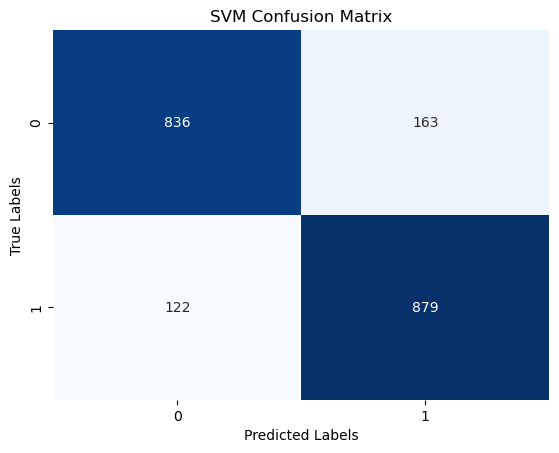

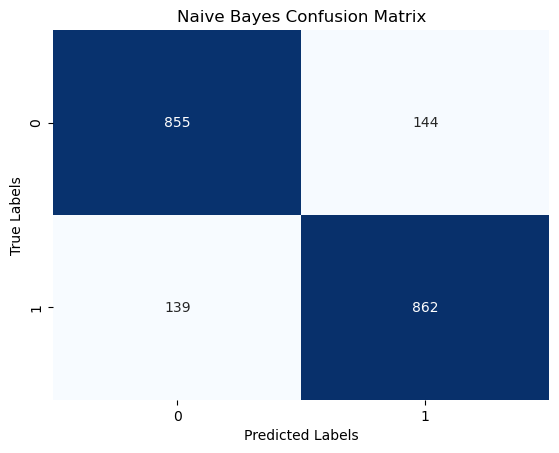

In [146]:
plot_confusion_matrix(y_test, svm_predictions, title='SVM Confusion Matrix')
plot_confusion_matrix(y_test, nb_predictions, title='Naive Bayes Confusion Matrix')

This Correlation plot helps in identifying how many instances of each label were correctly or incorrectly predicted. This helps in understanding the type of errors made by the classifiers.